---
bibliography: ../../SI-references.bib
---

# Clustering

## Introduction 

Clustering is a set of useful machine learning models that is used to build groups of data points that have similar features. While there are a variety of different clustering methods, I will give a brief overview of three clustering methods: KMeans, DBSCAN, and Hierarchical Clustering. 

### KMEANS
The K-Means clustering method is an unsupervised machine lerning algorithm. The goal of K-Means to group points that are similar together into cluseters in an attempt to reveal any underlying patterns. K-Means works only with numerical data, and each data point must be able to be described using numerical coordinates [@burkardt2009k].

<p align="right">
    <img src="../../images/elbow_method.png" height=240 width=340, alt="Your Image" style="float:right; margin-left:15px;" />
</p>

In order to return clusters of your selected input data, K-Means will create k numbers of clusters, based on a value of k that you select. One way that we can choose an optimal values of k is by using the elbow method, which plots the sum of the squared distances between each cluster as the value of k increases. When we look at the plot, there is a point where "increasing the size of the cluster provides minimal gain to the error function [@Artley_2022]." This can be seen in the image to the right.

After we choose our value for k, K-Means will assign each data point to a cluster using the euclidian distance to each centroid. After all the data points are assinged, the centroids of each cluster will be updated by taking the mean of the data points and assigning it to be the new center of the cluster. This reassigning points to clusters and recalcuating the centroids will occur until the centroids values don't change anymore [@Artley_2022]. 

### DBSCAN

DBSCAN, or density-based spatial clustering of applications with noise, is an unsupervised clustering algorithm based on clusters and noise. Any density based clustering method is useful when we have a dataset that has irregular or intertwined clusters or when there is a lot of noise or outliers. 

DBSCAN will first divide the dataset into n number of dimensions. Then it will group points together that are tightly packed by forming an n dimensional shape around each point in the dataset. Clusters will be formed by the points that fall within that shape [@Lutins_2017]. 

### Hierarchical Clustering

<p align="right">
    <img src="../../images/hierarchical-clustering.png" height=250 width=250, alt="Your Image" style="float:right; margin-left:15px;" />
</p>

Hierarchical clustering is an unsupervised clustering method. It has a nested structure that is somewhat organized like a tree, and does not assume a value of k. Hierarchical clustering can be further subdivided into two types: agglomerative (bottom up) and divisive (top down) hierarchical clustering. We can visualize this technique using a dendrogram.

<p align="left">
    <img src="../../images/agglomerative-clustering.png" height=240 width=340, alt="Your Image" style="float:left; margin-right:15px;" />
</p>

In agglomerative hierarchical clustering, "each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy [how to cite the slide]." The basic algorithm of agglomerative hierarchical clustering includes computing the proximity matrix, letting each data point be its own cluster, and then repreating to merge the two closest clusters and update the proximity matrix, until only one cluster remains [@Patlolla_2018]. 

Divisive hierarchical clustering is the opposite of agglomerative hierarchical clustering. In divisive hierarchical clustering, all of the observations start in one cluster, and then the splits are performed as one cluster moves down in the hierarchy.

## Methods 

### Data Selection 

I've decided to use the injury prevention factors data set for clustering because I am curious how different clustering methods would cluster the data based on the different injury prevention method that the athletes used. The goal of the clustering is to predict how many injuries an athlete would have and see what injury prevention methods are most common for athletes who have a certain number of injuries.  

### Feature Selection

In the Decision Trees tab, I found that the optimal features are the following six: Prevention Measure Stretching, Prevention Measure Warm Up, Prevention Measure Specific Strength Exercises, Prevention Measure Bracing, Prevention Measure Taping, and Prevention Measure Shoe Insoles. Two features were deamed not important, which were medical corsets and face masks, which makes sense as they had very small sample sizes. I will not perform feature selection again as I have already done it, but will instead use this subset. 

In [9]:
#| code-fold: true
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib as plt

file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"
soccer_injury = pd.read_csv(file_path)

soccer_injury.columns = soccer_injury.columns.str.strip()

soccer_injury = soccer_injury.replace({"yes": 1, "no": 0})
soccer_injury.head()

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,Previous Injuries,Number of Injuries,Ankle Injuries,...,Importance Injury Prevention,Knowledgeability,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset
0,146,19,173.0,67.6,1,3,1,1,6,1,...,2,1,1,0,1,0,0,0,0,0
1,155,22,179.5,71.0,1,3,1,1,2,0,...,1,1,1,1,0,0,0,0,0,0
2,160,22,175.5,71.8,1,3,1,1,7,1,...,1,1,1,0,0,0,0,1,0,0
3,164,23,190.0,80.5,1,4,1,1,1,0,...,1,1,1,1,1,0,0,0,0,0
4,145,19,173.5,68.7,1,3,1,1,2,1,...,1,2,1,1,0,0,1,0,0,0


In [10]:
#| code-fold: true
from sklearn.preprocessing import StandardScaler

important_features = ["Prevention Measure Stretching", "Prevention Measure Warm Up", "Prevention Measure Specific Strength Exercises", "Prevention Measure Bracing", "Prevention Measure Taping", "Prevention Measure Shoe Insoles"]
X = soccer_injury[important_features]
X_norm = StandardScaler().fit_transform(X)

X.head()

,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles
0,1,0,1,0,0,0
1,1,1,0,0,0,0
2,1,0,0,0,0,1
3,1,1,1,0,0,0
4,1,1,0,0,1,0


## Hyper-Parameter Tuning 

Hyper-parameter tuning is the process of finding the best and most effective set of parameters for each tuning method. As explained above, two ways we can find the optimal number of clusters are using the elbow method and the silhouette scores. 

### K-Means: Elbow Method

The 'Elbow' of the graph is: 3


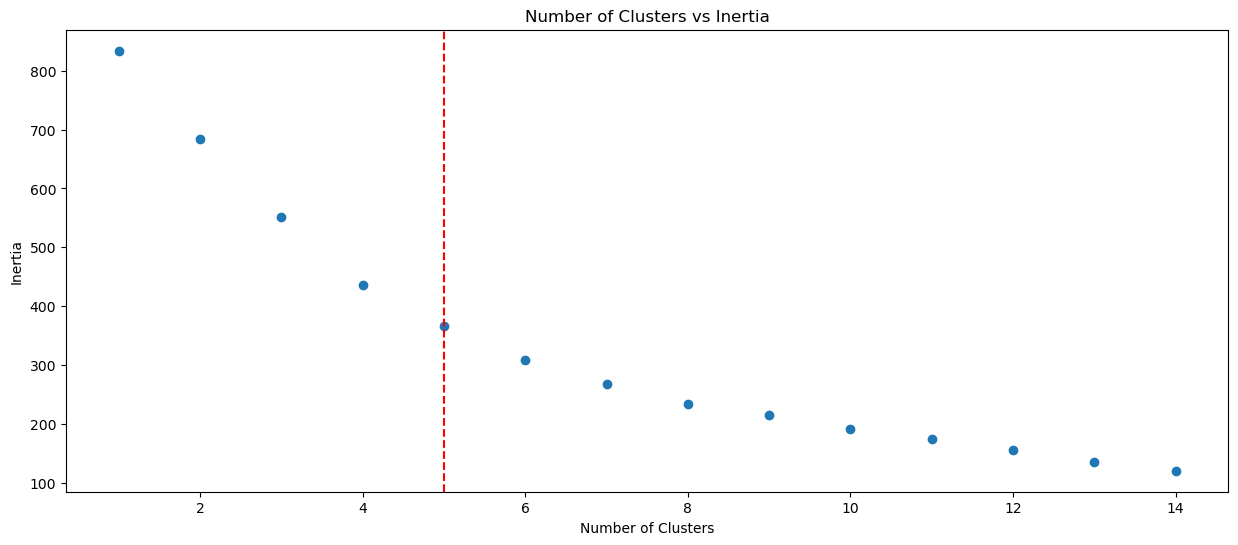

In [11]:
#| code-fold: true
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
import numpy as np 
import matplotlib.pyplot as plt

num_clusters = range(1, 15)
kmeans_values = []
inertia_values = []
distortion_values = []


for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_norm) 
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    distortion = 0
    for i in range(len(X_norm)):
        cluster_idx = labels[i]
        distortion += np.linalg.norm(X_norm[i] - centroids[cluster_idx])**2
    distortion /= len(X_norm) 
    distortion_values.append(distortion)

    inertia = kmeans.inertia_
    
    kmeans_values.append(k)
    inertia_values.append(inertia) 

df = pd.DataFrame({"Number of Clusters": kmeans_values, "Inertia": inertia_values, "Distortion": distortion_values})
df.head()

second_derivative = np.diff(np.diff(inertia_values))
elbow_index = np.argmax(second_derivative) + 1
print(f"The 'Elbow' of the graph is: {elbow_index}")

plt.figure(figsize=(15, 6))
plt.scatter(data=df, x="Number of Clusters", y="Inertia")
plt.title("Number of Clusters vs Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.axvline(x=5, color='r', linestyle='--', label='Elbow Point')


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0.5, 0, 'Number of Clusters')

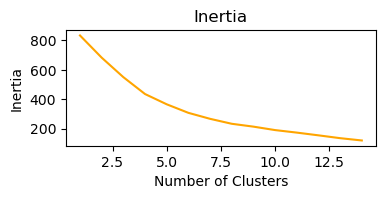

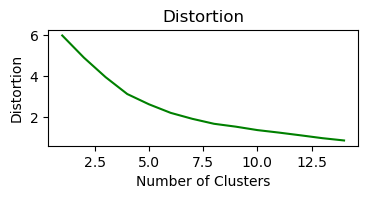

In [12]:
#| code-fold: true
#| warning: false
import seaborn as sns
plt.figure(figsize=(4, 1.5))
sns.lineplot(df, x="Number of Clusters", y="Inertia", color="orange")
plt.title("Inertia")
plt.xlabel("Number of Clusters")

plt.figure(figsize=(4, 1.5))
sns.lineplot(df, x="Number of Clusters", y="Distortion", color="green")
plt.title("Distortion")
plt.xlabel("Number of Clusters")

Based on the graphs above, we can determine that the optimal number of clusters to use is 5.

### K-Means Silhouette Score

In [13]:
#| code-fold: true
import sklearn.cluster

def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    i_print=False

    X=np.ascontiguousarray(X) 

    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("-----------------")
    print("OPTIMAL PARAMETER =",opt_param)
    print("-----------------")

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

In [14]:
#| code-fold: true

def plot(X,color_vector):
    fig, ax = plt.subplots()
    jitter = 0.01 * np.random.randn(*X.shape)
    X += jitter 
    ax.scatter(X.iloc[:,0], X.iloc[:,1],c=color_vector, cmap="viridis")
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    plt.show()

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

-----------------
OPTIMAL PARAMETER = 31
-----------------


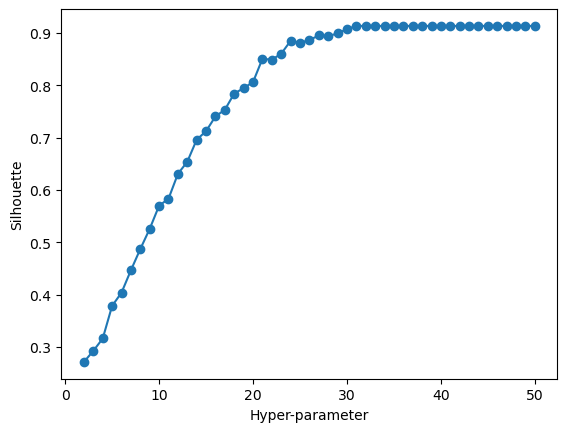

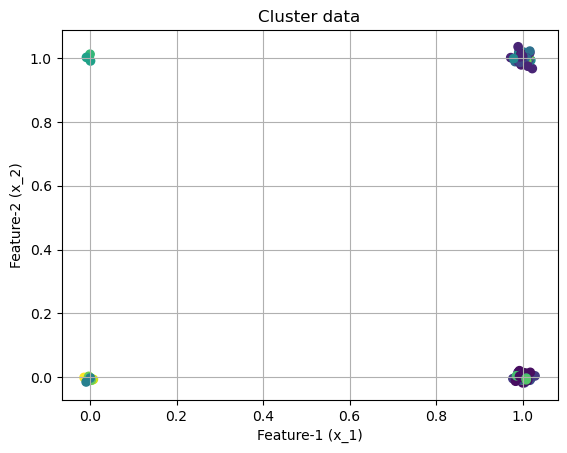

In [15]:
#| code-fold: true
#| warning: false
import sklearn.cluster
opt_labels=maximize_silhouette(X,algo="kmeans",nmax=50, i_plot=True)
plot(X,opt_labels)

### DBSCAN

-----------------
OPTIMAL PARAMETER = 0.5
-----------------


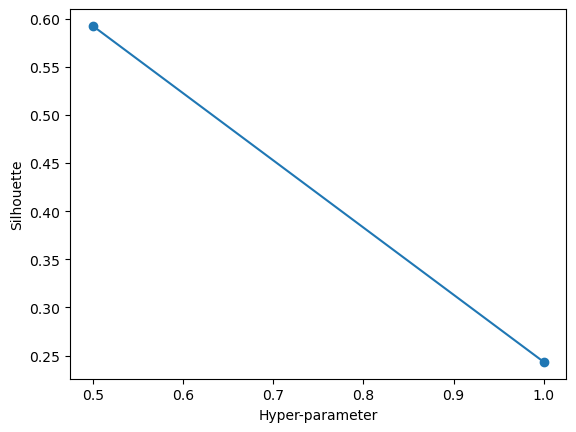

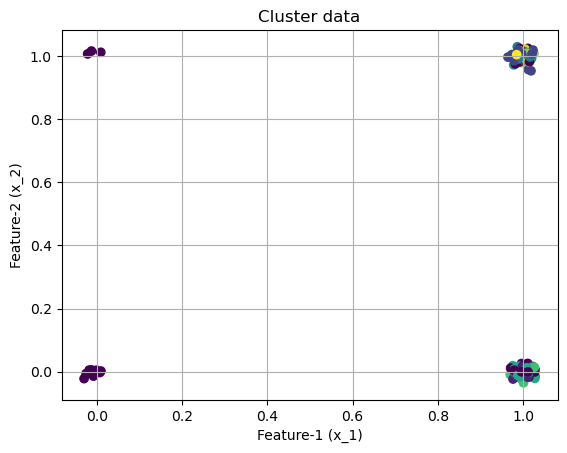

In [16]:
#| code-fold: true
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
plot(X,opt_labels)

### Agglomerative Clustering 

-----------------
OPTIMAL PARAMETER = 29
-----------------


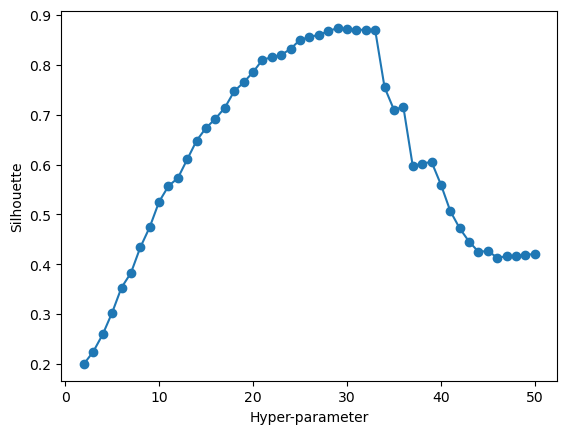

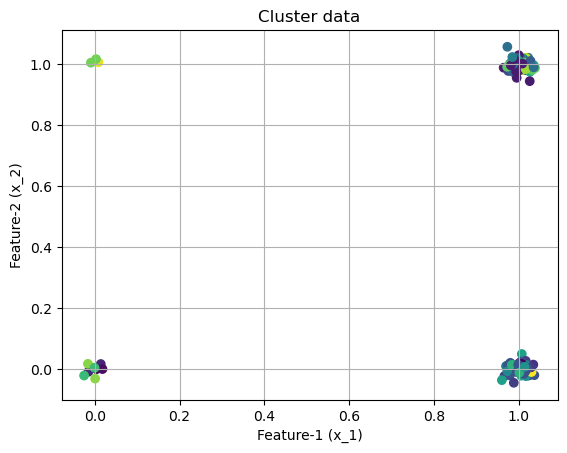

In [17]:
#| code-fold: true
opt_labels=maximize_silhouette(X,algo="ag",nmax=50, i_plot=True)
plot(X,opt_labels)

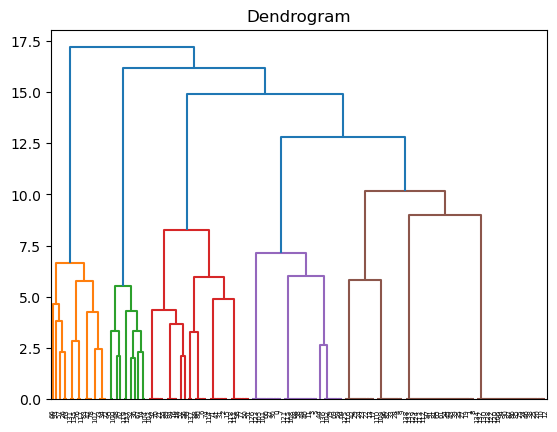

In [18]:
#| code-fold: true

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_norm, method="ward")
dendrogram(linkage_matrix)
plt.title('Dendrogram')

plt.show()

### Final Results 

In [19]:
#| code-fold: true
import sklearn.cluster
import numpy as np
import matplotlib.pyplot as plt

def maximize_silhouette(X, algo="birch", nmax=20, i_plot=False):
    X = np.ascontiguousarray(X)
    opt_param = 31

    if algo == "birch":
        model = sklearn.cluster.Birch(n_clusters=opt_param).fit(X)
        labels = model.predict(X)

    elif algo == "ag":
        model = sklearn.cluster.AgglomerativeClustering(n_clusters=opt_param).fit(X)
        labels = model.labels_

    elif algo == "dbscan":
        param = 0.5 * (opt_param - 1)
        model = sklearn.cluster.DBSCAN(eps=param).fit(X)
        labels = model.labels_

    elif algo == "kmeans":
        model = sklearn.cluster.KMeans(n_clusters=opt_param).fit(X)
        labels = model.predict(X)

    try:
        sil_score = sklearn.metrics.silhouette_score(X, labels)
    except:
        sil_score = None

    print("-----------------")
    print("OPTIMAL PARAMETER =", opt_param)
    print("-----------------")


    return labels

Text(0.5, 1.0, 'Agglomerative Clustering')

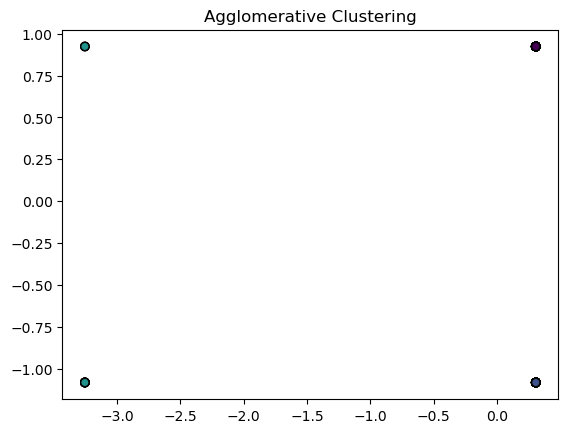

In [20]:
#| code-fold: true
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_cluster.fit_predict(X_norm)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=agg_labels, cmap="viridis", edgecolors="k")
plt.title("Agglomerative Clustering")


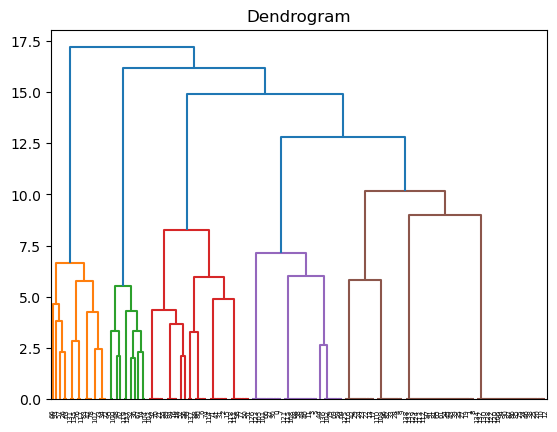

In [21]:
#| code-fold: true
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_norm, method="ward")
dendrogram(linkage_matrix)
plt.title('Dendrogram')

plt.show()

#### KMeans

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


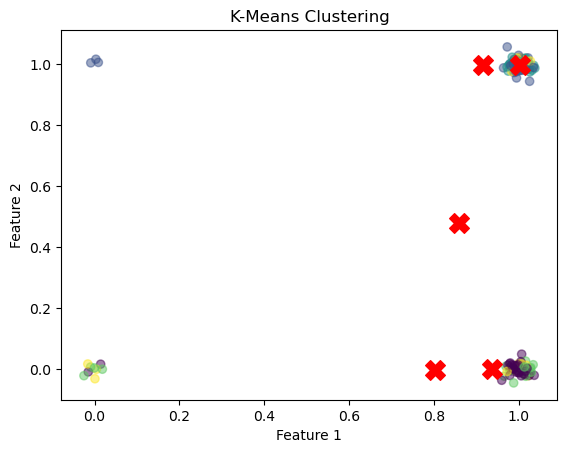

In [22]:
#| code-fold: true
#| warning: false
k=5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### DBSCAN 

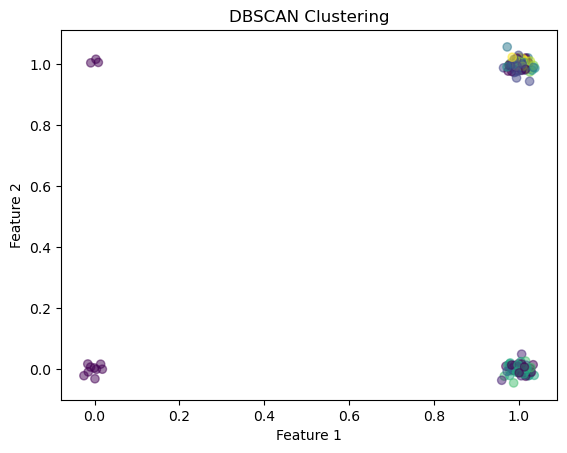

In [23]:
#| code-fold: true
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Results 

Agglomerative Clustering was the most successful clustering methods as it produced distinct clusters. K-Means and DBSCAN were somewhat successful but the clusters weren't well defined and the graphs were hard to read. All methods were easy to implement but for this data, agglometative clustering is definitely the best option. I would say that based on the agglomerative clustering results, we can learn that clusters are based off of injury prevention methods that athletes took. Points within similar clusters represent athletes who took similar measures. 

The optimal number of clusters was determined to be 5. This makes sense based on the nature of the features. There were 5 prevention measures that were very commonly used, which is illustrated in the plot below. I think we can perhaps make a connection between the optimal number of clusters and the years of football experience that an athlete has, though, as there are many labels in the dataset, it is hard to be definitive about this. 

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


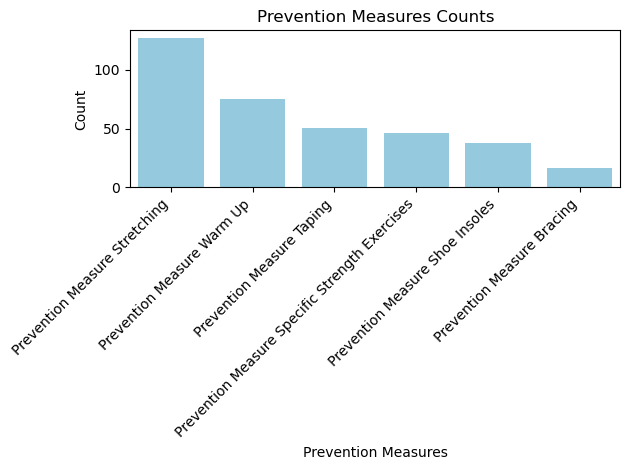

In [24]:
#| code-fold: true
#| warning: false
import seaborn as sns
import matplotlib.pyplot as plt

pm_counts = X.sum()
pm_counts = pm_counts.sort_values(ascending=False)

sns.barplot(x=pm_counts.index, y=pm_counts.values, color='skyblue')
plt.title('Prevention Measures Counts')
plt.xlabel('Prevention Measures')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

## Conclusions

The exploration of this soccer injuries data set revealed that among the clustering algorithms tested, Agglomerative Clustering emerged as the most effective method. It successfully delineated distinct clusters, offering a clear representation of athletes who implemented similar injury prevention measures.

The determination of an optimal number of clusters, set at 5, aligns well with the nature of the dataset. The five prevalent prevention measures identified in the clusters mirror the commonly used strategies among athletes. This finding underscores the practicality of Agglomerative Clustering in uncovering patterns related to injury prevention strategies.

Furthermore, the potential correlation between the optimal number of clusters and an athlete's years of football experience hints at a nuanced relationship worth exploring further. While the dataset contains numerous labels, making it challenging to definitively establish this connection, it opens avenues for future research and investigation.

Overall, the success of Agglomerative Clustering in providing clear and meaningful clusters emphasizes its applicability in understanding patterns of injury prevention among athletes. These insights contribute not only to the field of sports science but also hold relevance for real-life scenarios, potentially informing coaching strategies, training programs, and injury mitigation efforts in sports. As I continue to delve into the intricate details of athletes' choices in injury prevention, Agglomerative Clustering stands out as a valuable tool for bringing to light meaningful patterns that can positively impact the health of athletes.